In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import sklearn
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

In [2]:
%matplotlib inline

In [4]:
df = pd.read_excel('HDPE_data.xlsx', sheet_name='fullSheet')

In [5]:
print(df)

     Paper HDPE content     blend  Number Average (g/mol)  \
0        1          100       NaN                     NaN   
1        2          100       NaN                     NaN   
2        2          100       NaN                     NaN   
3        3          100       NaN                     NaN   
4        3          100       NaN                     NaN   
..     ...          ...       ...                     ...   
121     37          100       NaN                 15100.0   
122     38          100  tom sent                 32100.0   
123     38          100  tom sent                 32700.0   
124     38          100  tom sent                 25800.0   
125     38          100  tom sent                 23200.0   

     Weight Average (g/mol)  Dispersity (Mw/Mn) Density (g/cm3) Value  \
0                       NaN                 NaN                 0.942   
1                       NaN                 NaN                 0.945   
2                       NaN                 NaN 

In [6]:
def menuContent():
    print("Choose the % content HDPE:")
    print("[1] - 70%")
    print("[2] - 80%")
    print("[3] - 90%")
    print("[4] - 100%")
    print("[q] - Quit")

In [7]:
def menuInput():
    print("Choose an input feature of HDPE:")
    print("[1] - Weight Average")
    print("[2] - Number Average")
    print("[3] - Dispersity")
    print("[4] - Density")
    print("[5] - Degree of Crystallinity")
    print("[6] - Melting Point")
    print("[q] - Quit")

In [8]:
def selectAction(choice, menu):   
    testStandard = []

    if menu[choice][0] == "Melt Flow Index":
        
        print('')
        print("Now choose a mass:")
        for index, item in enumerate(menu[choice][1]):
            for index in [0,1,2]:        
                subMenuIndex = "[" + str(index + 1) +"] " 
                print(subMenuIndex, menu[choice][1][index])
                
            print('')    
            massChoice = int(input("Which mass do you want to see results for? ")) - 1 
            testStandard += [menu[choice][1][massChoice]]
            
            for index in [3]:
                
                print('')
                print("Now choose a test standard:")

                for index, item in enumerate(menu[choice][1][3]):
                    subMenuIndex = "[" + str(index + 1) +"] " 
                    print(subMenuIndex, menu[choice][1][3][index])
                    
                print('')
                testChoice = int(input("Which test standard do you want to see results for? ")) - 1 
                testStandard += [menu[choice][1][3][testChoice]]
                
                break 
                
            break

    else:
        print('')
        print("Now choose a test standard:")
        for index, item in enumerate(menu[choice][1]):
            subMenuIndex = "[" + str(index + 1) +"] " 
            print(subMenuIndex, menu[choice][1][index])
            
        # ask for action choice ...
        print('')
        actionChoice = int(input("Which test standard do you want to see results for? ")) - 1 
        testStandard = [menu[choice][1][actionChoice]]

    return testStandard

In [9]:
def menuOutput():
    menu = [["Impact strength",["ASTM D256", "All Test Standards"]], 
            ["Melt Flow Index", ["5kg", "2.16kg", "Any Mass",["ASTM D1238", "ISO 1133", "All Test Standards"]]],
            ["Elongation at Break", ["ASTM D638", "ISO 527", "All Test Standards"]],
            ["Tensile Strength at Yield"],
            ["Ultimate Tensile strength",["ASTM D638", "ISO 527", "All Test Standards"]],
            ["Young\'s Modulus", ["ASTM D638", "ISO 527", "All Test Standards"]],
            ["Quit"]]
     

    print("Choose an output feature of HDPE:")
    for index, item in enumerate(menu):
        for index in range(0,6):
        #         adds the [] around the index to make the menus appear consistent
            menuIndex = "[" + str(index + 1) +"] " 
            print(menuIndex, menu[index][0])
            
        for index in [6]:
            print('[q] ', menu[index][0])
            
            break
            
        break
        
    return menu


In [10]:
# menuOutput()

In [11]:
def menuImputation():
    print("Choose if you would like to use imputation and if so, which method:")
    print("[1] - No Imputation")
    print("[2] - Multivariate Imputation")
    print("[3] - Mean Univariate Imputation")
    print("[4] - Median Univariate Imputation")
    print("[5] - Most Frequent Univariate Imputation")
    print("[6] - Constant Imputation")
    print("[q] - Quit")

In [12]:
def getMenu():
    quit = False
    while True:
        # print menu
        print()
        menuContent() 
        print()
        
        
        # get input
        optionContent = input("please select a number option or q from the menu: ")
            
        if optionContent == "1":
            blend = '70'
            break
            
        elif optionContent == "2":
            blend = '80'
            break
            
        elif optionContent == "3":
            blend = '90'
            break
            
        elif optionContent == "4":
            blend = '100'
            break
            
        elif optionContent == 'q':
            blend = 'q'
            quit = True
            break
            
        else:
            print()
            print("Please enter a valid option from the menu")
            
    while True:
        
        if quit:
            break
            
        # print menu
        print()
        menuInput() 
        print()

        # get input
        optionOne = input("please select a number option or q from the menu: ")
        
        if optionOne == "1":
            inputProp = 'Weight Average (g/mol)'
            break
            q
        elif optionOne == "2":
            inputProp = 'Number Average (g/mol)'
            break
            
        elif optionOne == "3":
            inputProp = 'Dispersity (Mw/Mn)'
            break
            
        elif optionOne == "4":
            inputProp = 'Density (g/cm3)'
            break
            
        elif optionOne == "5":
            inputProp = 'Degree of Crystallinity (%)'
            break

        elif optionOne == "6":
            inputProp = 'Melting Point (°C)'
            break
            
        elif optionOne == 'q':
            inputProp = 'q'
            quit = True
            break
            
        else:
            print()
            print("Please enter a valid option from the menu")
        

        
    while True:
        
        if quit:
            break
        
        # print menu
        print()
        menu = menuOutput()
        print()

        # get input
        optionTwo = input("please select a number option or q from the menu: ")
    
            
        if optionTwo == "1":
            outputProp = 'Impact Strength (J/m)'

        
        elif optionTwo == "2":
            outputProp = 'Melt Flow Index (g/10 min)'

        
        elif optionTwo == "3":
            outputProp = 'Elongation at Break (%)'

        
        elif optionTwo == "4":
            outputProp = 'Tensile Strength at Yield (MPa)'
            ts = 'none'
            break
        
        elif optionTwo == "5":
            outputProp = 'Ultimate Tensile Strength (MPa)'

        
        elif optionTwo == "6":
            outputProp = 'Young\'s Modulus (MPa)'

        
        elif optionTwo == 'q':
            outputProp = 'q'
            quit = True
            break
            
        else:
            print()
            print("Please enter a valid option from the menu")

        optionTwo = int(optionTwo) - 1 

        if optionTwo != 3:
            optionTwo = int(optionTwo) 
            ts = selectAction(optionTwo, menu)
#                 print(action) 
            break
                
        
    while True:
        
        if quit:
            inputProp = 'q'
            outputProp = 'q'
            blend = 'q'
            imputation = 'q'
            ts = 'q'
            break
            
        # print menu
        print()
        menuImputation() 
        print()

        # get input
        optionImputation = input("please select a number option or q from the menu: ")
        
        if optionImputation == "1":
            imputation = 'none'
            break
            
        elif optionImputation == "2":
            imputation = 'multi'
            break
            
        elif optionImputation == "3":
            imputation = 'mean'
            break
            
        elif optionImputation == "4":
            imputation = 'median'
            break
            
        elif optionImputation == "5":
            imputation = 'most_frequent'
            break
            
        elif optionImputation == "6":
            imputation = 'constant'
            break
            
        elif optionImputation == 'q':
            imputation = 'q'
            quit = True
            break
            
        else:
            print()
            print("Please enter a valid option from the menu")
    
    if quit == True:
        print("")
        return inputProp, outputProp, blend, imputation, ts
        
    else: 
        print()
        print("HDPE content: ", blend)
        print("option one: ", inputProp)
        print("option two: ", outputProp)
        print("imputation: ", imputation)
        print("test standard(s): ", ts)
        print()
        
    return inputProp, outputProp, blend, imputation, ts

        

In [13]:
# getMenu()

In [14]:
# filteredBlends uses the variable blend and returns all datapoints which have that % content
def filterBlends(blend, df):
    
    # if specified use all datapoints 
    if blend == 'All':
        return df

    # else there needs to be a comparison to return the entries of the DF which have the specified HDPE % or more      
    else:
        df = df.copy()
        blend = float(blend)
        df['HDPE content'] = pd.to_numeric(df['HDPE content'],errors='coerce')

        dfMask = df['HDPE content'] >= blend
#         print(dfMask)
        
        blendDf = df[dfMask]
#         print(blendDf)

    
        return blendDf

In [15]:
def filterStandards(tsName, testStandards, reducedDf):
#     print(tsName)
    if len(testStandards) == 1:
        if testStandards[0] == "All Test Standards":

            return reducedDf 

        else:  
            print("not all")
            dfMask = reducedDf[tsName[0]] == testStandards[0]
            standDf = reducedDf[dfMask]

            return standDf

    elif len(testStandards) == 2:
        
        print("MFI")

        if testStandards[0] == '2.16kg':
#             print('here')
            mass = 2.16
            
        elif testStandards[0] == '5kg':
            mass = 5 
        
        else:
            pass
            
            
        if testStandards[0] == "Any Mass":
            print("Any mass")
        
            if testStandards[1] == "All Test Standards":
                print("All ts")
                
                return reducedDf 
            
            else:
                standDf = reducedDf[reducedDf[tsName[1]] == testStandards[1]]
                
                return standDf
            
        else:
            
            if testStandards[1] == "All Test Standards":
                standDf = reducedDf[reducedDf[tsName[0]] == mass]

                return standDf
            
            else:
                print('here for both TS')
                standDf = reducedDf[(reducedDf[tsName[1]] == testStandards[1]) & (reducedDf[tsName[0]] == mass)]
#                 print(standDf)
                return standDf
        
#     elif len(tsName) == 2:
#         print("input and output have TS")
#         return reducedDf 

        
    else:
        print("no test standards")
        return reducedDf 

In [16]:
# tsName = 'Elongation at break (%) Test Standard'
# testStandards = ["ISO 527"]
# testDf = filterStandards(tsName, testStandards, df)
# print(testDf)

In [17]:
def cleanData(prop, df):
    #     density range: 0.93 - 0.97 (g/cm^3)
    #     crytallinity range: 60 - 90 (%)
    #     tensile strength at yeild: 23.0 - 29.5 (MPa)
    #     ultimate tensile strength: 22 - 33 (MPa)
    #     elongation at break: 600 - 1350 (%)
    
    df['Density (g/cm3) Value'] = pd.to_numeric(df['Density (g/cm3) Value'],errors='coerce')
 
    
    if prop == 'Density (g/cm3)': 
        
        cleanDf = df[df['Density (g/cm3) Value'].between(0.93, 0.97)]
        pass
    
    elif prop == 'Degree of Crystallinity (%)':
        
        cleanDf = df[df['Crystallinity (%)'].between(60, 90)]
        pass
        
    elif prop == 'Tensile Strength at Yield (MPa)':
        
        cleanDf = df[df['Ultimate Tensile strength (MPa) Value'].between(23, 29.5)]
        pass
     
    elif prop == 'Ultimate Tensile Strength (MPa)':
        
        cleanDf = df[df['Ultimate Tensile strength (MPa) Value'].between(22, 33)]
        pass
        
    elif prop == 'Ultimate Tensile strength (MPa)':
        
        cleanDf = df[df['Elongation at break (%) Value'].between(600, 1350)]
        pass
        
    else: 
        print('no specified parameters for output')
        return df


    print(cleanDf)
    return cleanDf 


In [18]:
def getDataFrame(colNames, df):
    # temp data frame with the names of the columns we are interested in
    tempDf = df[colNames].copy()

    tempDf[tsNames] = tempDf[tsNames].fillna('0')
    
    tempDf = tempDf.dropna() 
    
    return tempDf

In [19]:
#  getColNames will eventually take the global varibles inputProp and outputProp from user input and then get the actual 
# column names needed to create the smaller dataframes of the specified features
def getColNames():
    
#     print(inputProp)
#     print(outputProp)

    tsNames = []
    
    if inputProp == 'Weight Average (g/mol)':
        valNames = ['Weight Average (g/mol)']
        
    elif inputProp == 'Number Average (g/mol)':
        valNames = ['Number Average (g/mol)']
        
    elif inputProp == 'Dispersity (Mw/Mn)':
        valNames = ['Dispersity (Mw/Mn)']
        
    elif inputProp == 'Density (g/cm3)':
        valNames = ['Density (g/cm3) Value']
        tsNames = ['Density (g/cm3) Test Standard']  
        
    elif inputProp == 'Melting Point (°C)':
        colNames = ['Melting Point (°C)']
        
    elif inputProp == 'Degree of Crystallinity (%)':
        valNames = ['Crystallinity (%)']
        
    else:
        print('input property not recognised')
        
    if intProp == 'Weight Average (g/mol)':
        valNames = ['Weight Average (g/mol)']
        
    elif intProp == 'Number Average (g/mol)':
        valNames = ['Number Average (g/mol)']
        
    elif intProp == 'Dispersity (Mw/Mn)':
        valNames = ['Dispersity (Mw/Mn)']    
   
    elif intProp == 'Density (g/cm3)':
        valNames += ['Density (g/cm3) Value']
        tsNames += ['Density (g/cm3) Test Standard']  
        
    elif intProp == 'Melting Point (°C)':
        colNames += ['Melting Point (°C)']
        
    elif intProp == 'Degree of Crystallinity (%)':
        valNames += ['Crystallinity (%)']
        
    else:
        print('intermediary property not recognised')
    
    if outputProp == 'Impact Strength (J/m)':
        valNames += ['Impact strength (J/m) Value']
        tsNames += ['Impact strength (J/m) Test Standard']
        
    elif outputProp == 'Melt Flow Index (g/10 min)':
        valNames += ['Melt flow index (g/10 min) Value']
        tsNames += ['Melt flow index (g/10 min) Weight', 'Melt flow index (g/10 min) Test Standard ', 'Melt flow index (g/10 min) Temp']
        
    elif outputProp == 'Elongation at Break (%)':
        valNames += ['Elongation at break (%) Value']
        tsNames += ['Elongation at break (%) Test Standard']
        
    elif outputProp == 'Tensile Strength at Yield (MPa)':
        valNames += ['Tensile strength at yield (MPa) Value']
        tsNames += ['Tensile strength at yield (MPa) Test Standard']
        
    elif outputProp == 'Ultimate Tensile Strength (MPa)':
        valNames += ['Ultimate Tensile strength (MPa) Value']
        tsNames += ['Ultimate Tensile strength (MPa) Test Standard']
        
    elif outputProp == 'Young\'s Modulus (MPa)':
        valNames += ['Young\'s modulus (MPa) Value']
        tsNames += ['Young\'s modulus (MPa) Test Standard']
        
    else:
        print('output property not recognised')


    return valNames, tsNames

In [20]:
def colourPapers(x, y, label):
    xSame = []
    xDiff = [] 
    xImp = []
    
    ySame = []
    yDiff = [] 
    yImp = []
    
    sameCol = []
    for i in range(0, len(label)):
        xVal = x[i]
        yVal = y[i]
  
        if label[i] == -1:
            col.append(-1) 
            xImp.append(x[i])
            yImp.append(y[i])
            
            pass
        else:
            temp = label[i]
            if i != len(label)-1:
                if temp == label[i+1] or temp == label[i-1]:
                    sameCol.append(label[i])
                    xSame.append(x[i])
                    ySame.append(y[i])
                    pass
                
                else:
                    xDiff.append(x[i])
                    yDiff.append(y[i])
            else: 
                if temp == label[i-1]:
                    sameCol.append(label[i])
                    xSame.append(x[i])
                    ySame.append(y[i])
                    pass
                
                else:
                    xDiff.append(x[i])
                    yDiff.append(y[i])
    
    return sameCol, np.array(xSame), np.array(ySame), np.array(xDiff), np.array(yDiff), np.array(xImp), np.array(yImp)

In [21]:
def linearReg(x, y, label, blend, imputation):                                   
    # scikitlearn function 
    LR = LinearRegression()
    
    col, xSame, ySame, xDiff, yDiff, xImp, yImp = colourPapers(x, y, label)
    print(col)
    
    # training the model with data for the two features being modelled
    print(x)
    LR.fit(x.reshape(-1,1), y)
    Prediction = LR.predict(x.reshape(-1,1))
    # plotting the reults and the data points 
    plt.plot(x, Prediction, label = 'Linear Regression', c = 'k')
    
    if imputation != 'none':

        plt.scatter(xImp, yImp, label = 'Imputed', c = 'm')
        plt.scatter(xDiff, yDiff, label = 'Individual', c = 'c')
        plt.scatter(xSame, ySame, label = 'Same Paper (var colours)', c = col, cmap = plt.cm.Set1)

            
    else:
        plt.scatter(xDiff, yDiff, label = 'Individual', c = 'c')
        plt.scatter(xSame, ySame, label = 'Same Paper (var colours)', c = col, cmap = plt.cm.Set1)
        
    plt.xlabel(inputProp)
    plt.ylabel(outputProp)
    plt.legend()
    plt.title(outputProp + ' vs ' + inputProp + ' Linear Reg with HDPE perecent: ' + str(blend) + ' imputution: ' + imputation)
    plt.show()

In [22]:
def singleImputation(df, method):
    imp = SimpleImputer(missing_values=np.nan,strategy = method)
#     \missing_values=np.nan
    imp.fit_transform(df)

    return (imp.transform(df))


In [23]:
def multiImputation(df):
    imp = IterativeImputer(max_iter=10, random_state=0, min_value = 0)
    imp.fit_transform(df)
    IterativeImputer(random_state=0)
    
    return (imp.transform(df))

In [24]:
def missing(df):
    tempDf = df.isnull() == False
    
#     add on new column which records if either the input or the output value is missing (false = one is missing)
    df['Missing'] = tempDf[valNames[0]] & tempDf[valNames[1]]
#     print(df)
#     if one is missing, then set the value of paper column to -1 so it iwll make all these points the same colour
    df.loc[df.Missing == False, "Paper"] = -1

    return df

In [27]:
while True: 
    print('make copy')
    df = df.copy()
    
    inputProp, outputProp, blend, imputation, testStands = getMenu()

    if inputProp != 'q':
        
        
        valNames, tsNames = getColNames()
        blendDf = filterBlends(blend, df)
        
        colNames = valNames + tsNames + ['Paper'] 
            
        standardDf = filterStandards(tsNames, testStands, blendDf)
    
#         df = cleanData(outputProp, df)
#         df = cleanData(inputProp, df)
    

        if imputation == 'none':
            reducedDf = getDataFrame(colNames, standardDf)
            pass
         
        elif imputation == 'multi':
            valNames += ['Paper']
            tempDf = standardDf[valNames]
            tempDf = tempDf.dropna(subset = valNames, axis = 0, thresh = 2)            

            missingDf = missing(tempDf)
            impRes = multiImputation(missingDf)
            pass

        else: 
            print('single')
            valNames += ['Paper']
            tempDf = standardDf[valNames]
            tempDf = tempDf.dropna(subset = valNames, axis = 0, thresh = 2)            

            missingDf = missing(tempDf)
            impRes = singleImputation(missingDf, imputation)

        y = []
        x = []
        label = []

        if imputation != 'none': 
            print(missingDf)
            for index, row in missingDf.iterrows():
                label.append(row[-2])

#             print(impRes)
            for row in impRes:
                y.append(row[1])
                x.append(row[0])

        else:
            for index, row in reducedDf.iterrows():
                y.append([float(row[1])])
                x.append([float(row[0])])
                label.append(row[-1])

        y = np.array(y)
        x = np.array(x)

        linearReg(x, y, label, blend, imputation)
            
    else:
        print("User quit")
        break


make copy

Choose the % content HDPE:
[1] - 70%
[2] - 80%
[3] - 90%
[4] - 100%
[q] - Quit



In [30]:
name = input("type your name")
print('my name is ', name)

my name is  


In [25]:
label = [-1, 3, 3, -1, -1, -1, -1, -1, 11, -1, -1, -1, -1, -1, -1, -1, 20, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]

print(len(label))
print(label)
col = []
for i in range(0, len(label)):
    if label[i] == -1:
        col.append(-1)  
        pass
    else:
        temp = label[i]
        if i != len(label)-1:
            if temp == label[i+1] or temp == label[i-1]:
                col.append(label[i])
                pass
            else:
                col.append(0)
        else: 
            if temp == label[i-1]:
                col.append(label[i])
                pass
            else:
                col.append(0)

print(col)
print(len(col))

38
[-1, 3, 3, -1, -1, -1, -1, -1, 11, -1, -1, -1, -1, -1, -1, -1, 20, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, 3, 3, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
38


make copy
intermediary property not recognised
[36, 36, 36]
[[0.963]
 [0.962]
 [0.961]
 [0.965]
 [0.954]
 [0.96 ]
 [0.94 ]
 [0.95 ]
 [0.95 ]]


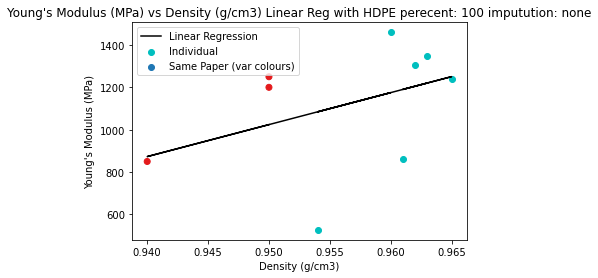

intermediary property not recognised
    Density (g/cm3) Value  Young's modulus (MPa) Value  Paper  Missing
0                   0.942                          NaN     -1    False
1                   0.945                          NaN     -1    False
2                   0.945                          NaN     -1    False
3                   0.954                          NaN     -1    False
4                   0.954                          NaN     -1    False
8                    0.95                          NaN     -1    False
14                  0.965                          NaN     -1    False
17                  0.963                      1350.00      7     True
20                  0.962                      1307.00      8     True
21                  0.961                       862.73      9     True
23                  0.965                      1240.00     11     True
24                  0.962                          NaN     -1    False
32                  0.948               

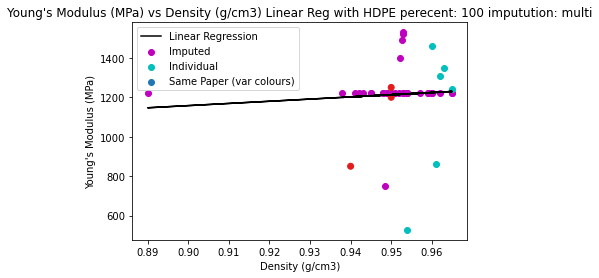

intermediary property not recognised
single
    Density (g/cm3) Value  Young's modulus (MPa) Value  Paper  Missing
0                   0.942                          NaN     -1    False
1                   0.945                          NaN     -1    False
2                   0.945                          NaN     -1    False
3                   0.954                          NaN     -1    False
4                   0.954                          NaN     -1    False
8                    0.95                          NaN     -1    False
14                  0.965                          NaN     -1    False
17                  0.963                      1350.00      7     True
20                  0.962                      1307.00      8     True
21                  0.961                       862.73      9     True
23                  0.965                      1240.00     11     True
24                  0.962                          NaN     -1    False
32                  0.948        

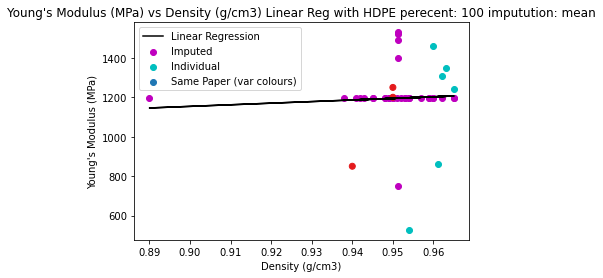

intermediary property not recognised
single
    Density (g/cm3) Value  Young's modulus (MPa) Value  Paper  Missing
0                   0.942                          NaN     -1    False
1                   0.945                          NaN     -1    False
2                   0.945                          NaN     -1    False
3                   0.954                          NaN     -1    False
4                   0.954                          NaN     -1    False
8                    0.95                          NaN     -1    False
14                  0.965                          NaN     -1    False
17                  0.963                      1350.00      7     True
20                  0.962                      1307.00      8     True
21                  0.961                       862.73      9     True
23                  0.965                      1240.00     11     True
24                  0.962                          NaN     -1    False
32                  0.948        

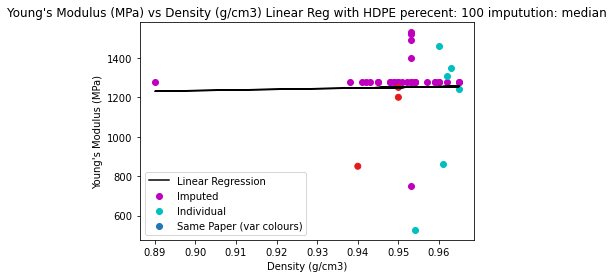

In [26]:
# fig = plt.figure()
# ax = fig.add_subplot(11, projection='3d')

listInputs = ['Number Average (g/mol)', 'Weight Average (g/mol)', 'Dispersity (Mw/Mn)', 'Density (g/cm3)', 'Melting Point (°C)', 'Degree of Crystallinity (%)']
listOutputs = ['Young\'s Modulus (MPa)', 'Melt Flow Index (g/10 min)', 'Ultimate Tensile Strength (MPa)','Impact Strength (J/m)','Elongation at Break (%)','Tensile Strength at Yield (MPa)']
listImputation = ['none', 'multi', 'mean', 'median']

print('make copy')
df = df.copy()
    
# inputProp, outputProp, blend, imputation, testStands = getMenu()
intProp = ''
inputProp = listInputs[3]
outputProp = listOutputs[0]
blend = 100

# imputation = 'multi'
testStands = ['All Test Standards']
    
for imp in listImputation:
    imputation = imp 

    valNames, tsNames = getColNames()
    blendDf = filterBlends(blend, df)

    colNames = valNames + tsNames + ['Paper'] 

    standardDf = filterStandards(tsNames, testStands, blendDf)

    #         df = cleanData(outputProp, df)
    #         df = cleanData(inputProp, df)


    if imputation == 'none':
        reducedDf = getDataFrame(colNames, standardDf)
        pass

    elif imputation == 'multi':
        valNames += ['Paper']
        tempDf = standardDf[valNames]
        tempDf = tempDf.dropna(subset = valNames, axis = 0, thresh = 2)            

        missingDf = missing(tempDf)
        impRes = multiImputation(missingDf)
        pass

    else: 
        print('single')
        valNames += ['Paper']
        tempDf = standardDf[valNames]
        tempDf = tempDf.dropna(subset = valNames, axis = 0, thresh = 2)            

        missingDf = missing(tempDf)
        impRes = singleImputation(missingDf, imputation)

    y = []
    x = []
    label = []

    if imputation != 'none': 
        print(missingDf)
        for index, row in missingDf.iterrows():
            label.append(row[-2])

    #             print(impRes)
        for row in impRes:
            y.append(row[1])
            x.append(row[0])

    else:
        for index, row in reducedDf.iterrows():
            y.append([float(row[1])])
            x.append([float(row[0])])
            label.append(row[-1])

    y = np.array(y)
    x = np.array(x)

    linearReg(x, y, label, blend, imputation)


make copy
[[ 1.90469289e+04  1.35000000e+03 -1.00000000e+00  0.00000000e+00]
 [ 6.08700000e+03  1.30700000e+03  8.00000000e+00  1.00000000e+00]
 [ 1.90469834e+04  8.62730000e+02 -1.00000000e+00  0.00000000e+00]
 [ 1.90469412e+04  1.24000000e+03 -1.00000000e+00  0.00000000e+00]
 [ 1.70000000e+04  1.19541405e+03 -1.00000000e+00  0.00000000e+00]
 [ 4.80645200e+04  1.19231578e+03 -1.00000000e+00  0.00000000e+00]
 [ 2.47826100e+04  1.19463783e+03 -1.00000000e+00  0.00000000e+00]
 [ 1.92727300e+04  5.26970000e+02  2.00000000e+01  1.00000000e+00]
 [ 1.90469234e+04  1.40000000e+03 -1.00000000e+00  0.00000000e+00]
 [ 1.90469099e+04  1.52000000e+03 -1.00000000e+00  0.00000000e+00]
 [ 1.90469088e+04  1.53000000e+03 -1.00000000e+00  0.00000000e+00]
 [ 1.90469133e+04  1.49000000e+03 -1.00000000e+00  0.00000000e+00]
 [ 1.90469166e+04  1.46000000e+03 -1.00000000e+00  0.00000000e+00]
 [ 1.79617800e+04  1.19531812e+03 -1.00000000e+00  0.00000000e+00]
 [ 7.24138000e+03  1.19638734e+03 -1.00000000e+00  0

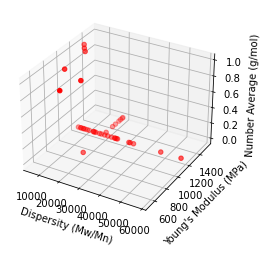

In [27]:
listInputs = ['Number Average (g/mol)', 'Weight Average (g/mol)', 'Dispersity (Mw/Mn)', 'Density (g/cm3)', 'Melting Point (°C)', 'Degree of Crystallinity (%)']
listOutputs = ['Young\'s Modulus (MPa)', 'Melt Flow Index (g/10 min)', 'Ultimate Tensile Strength (MPa)','Impact Strength (J/m)','Elongation at Break (%)','Tensile Strength at Yield (MPa)']
listImputation = ['none', 'multi', 'mean', 'median']

print('make copy')
df = df.copy()
    
inputProp = listInputs[2]
intProp = listInputs[0]
outputProp = listOutputs[0]
blend = 100
imputation = 'multi'
testStands =['All Test Standards']
    

valNames, tsNames = getColNames()
blendDf = filterBlends(blend, df)

colNames = valNames + tsNames + ['Paper'] 

standardDf = filterStandards(tsNames, testStands, blendDf)


if imputation == 'none':
    reducedDf = getDataFrame(colNames, standardDf)
    pass

elif imputation == 'multi':
    valNames += ['Paper']
    tempDf = standardDf[valNames]
    tempDf = tempDf.dropna(subset = valNames, axis = 0, thresh = 2)            

    missingDf = missing(tempDf)
    impRes = multiImputation(missingDf)
    pass

else: 
    print('single')
    valNames += ['Paper']
    tempDf = standardDf[valNames]
    tempDf = tempDf.dropna(subset = valNames, axis = 0, thresh = 2)            

    missingDf = missing(tempDf)
    impRes = singleImputation(missingDf, imputation)

y = []
x = []
z = []
label = []

if imputation != 'none': 
#     print(missingDf)
    for index, row in missingDf.iterrows():
        label.append(row[-2])

    print(impRes)
    for row in impRes:
        y.append(row[1])
        x.append(row[0])
        z.append(row[3])

else:
    for index, row in reducedDf.iterrows():
        y.append([float(row[1])])
        x.append([float(row[0])])
        label.append(row[-1])

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel(inputProp)
ax.set_ylabel(outputProp)
ax.set_zlabel(intProp)

plt.show()